In [55]:
%load_ext autotime
from sklearnex import patch_sklearn
patch_sklearn()

import pandas as pd
import numpy as np
import pickle

from lightgbm import LGBMClassifier

from sklearn.metrics import classification_report

from sklearn.model_selection import train_test_split

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

import matplotlib.pyplot as plt

The autotime extension is already loaded. To reload it, use:
  %reload_ext autotime
time: 0 ns (started: 2022-10-01 13:02:56 +07:00)


Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [56]:
SEED = 1234
df = pd.read_csv('Train_Preprocessed.csv')
y = df['Fakultas']
X = df.drop(['Fakultas'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=.25, random_state=SEED)
df.head()

,Bahasa,Inggris,TIK,Matematika,Fisika,Kimia,Biologi,Geografi,Sosiologi,Antropologi,...,Extra_Kurikuler_Ekskul_3,Extra_Kurikuler_Ekskul_4,Extra_Kurikuler_Ekskul_5,Extra_Kurikuler_Ekskul_6,Extra_Kurikuler_Tidak,Tinggal_Dengan_Orang Tua,Tinggal_Dengan_Others,Status_Kerja_Belum,Biaya_Orang Tua,Biaya_Others
0,69.8,64.6,64.0,81.5,88.2,86.7,68.3,74.0,67.7,70.7,...,0,1,0,0,0,0,0,1,0,0
1,68.7,88.3,80.9,80.7,67.8,67.3,72.1,77.3,64.4,62.8,...,0,1,0,0,0,0,1,1,0,1
2,83.8,79.8,79.2,66.3,82.3,82.7,74.2,84.0,75.4,65.9,...,0,0,0,0,0,0,1,0,0,0
3,66.7,63.7,64.0,60.2,75.9,87.6,85.6,68.1,73.7,61.7,...,0,1,0,0,0,1,0,1,0,0
4,62.3,76.8,77.0,87.1,65.1,65.7,70.8,67.0,77.3,79.0,...,0,0,0,0,0,1,0,0,0,1


time: 62 ms (started: 2022-10-01 13:02:56 +07:00)


In [57]:
df.columns

Index(['Bahasa', 'Inggris', 'TIK', 'Matematika', 'Fisika', 'Kimia', 'Biologi',
       'Geografi', 'Sosiologi', 'Antropologi', 'Fakultas', 'Mean_Nilai',
       'Mean_IPA', 'Mean_Bahasa', 'Mean_IPS', 'Gender_Wanita',
       'Extra_Kurikuler_Ekskul_2', 'Extra_Kurikuler_Ekskul_3',
       'Extra_Kurikuler_Ekskul_4', 'Extra_Kurikuler_Ekskul_5',
       'Extra_Kurikuler_Ekskul_6', 'Extra_Kurikuler_Tidak',
       'Tinggal_Dengan_Orang Tua', 'Tinggal_Dengan_Others',
       'Status_Kerja_Belum', 'Biaya_Orang Tua', 'Biaya_Others'],
      dtype='object')

time: 16 ms (started: 2022-10-01 13:02:57 +07:00)


In [58]:
param_test ={'num_leaves': [int(x) for x in np.linspace(10, 1000, 50)], 
             'max_depth': [int(x) for x in np.linspace(1, 15, 2)],
             'min_child_samples': [int(x) for x in np.linspace(10, 500, 30)], 
             'min_child_weight': [1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3],
             'reg_alpha': [0, 1e-1, 1, 2, 5, 10, 50, 100],
             'reg_lambda': [0, 1e-1, 1, 5, 10, 50, 100],
             'n_estimators' : [50, 100, 200, 500, 1000],
             'learning_rate' : [1e-2, 1e-1]}

time: 0 ns (started: 2022-10-01 13:02:58 +07:00)


In [62]:
GBM = LGBMClassifier(random_state = 1234, n_jobs = -1)
GBM_ = RandomizedSearchCV(
    estimator = GBM,
    param_distributions = param_test, 
    n_iter = 200,
    scoring = 'accuracy',
    cv = 3,
    refit = True,
    random_state = 1234,
    verbose = 3
)

time: 0 ns (started: 2022-10-01 13:03:42 +07:00)


In [63]:
GBM_.fit(X_train, y_train)
GBM_pred = GBM_.predict(X_test)

print(GBM_.best_estimator_)
print(GBM_.best_params_)

Fitting 3 folds for each of 200 candidates, totalling 600 fits
[CV 1/3] END learning_rate=0.01, max_depth=1, min_child_samples=77, min_child_weight=1000.0, n_estimators=500, num_leaves=636, reg_alpha=100, reg_lambda=100;, score=0.202 total time=   0.2s
[CV 2/3] END learning_rate=0.01, max_depth=1, min_child_samples=77, min_child_weight=1000.0, n_estimators=500, num_leaves=636, reg_alpha=100, reg_lambda=100;, score=0.202 total time=   0.3s
[CV 3/3] END learning_rate=0.01, max_depth=1, min_child_samples=77, min_child_weight=1000.0, n_estimators=500, num_leaves=636, reg_alpha=100, reg_lambda=100;, score=0.203 total time=   0.4s
[CV 1/3] END learning_rate=0.1, max_depth=1, min_child_samples=145, min_child_weight=100.0, n_estimators=500, num_leaves=131, reg_alpha=0, reg_lambda=5;, score=0.213 total time=   0.5s
[CV 2/3] END learning_rate=0.1, max_depth=1, min_child_samples=145, min_child_weight=100.0, n_estimators=500, num_leaves=131, reg_alpha=0, reg_lambda=5;, score=0.192 total time=   0.

[CV 3/3] END learning_rate=0.1, max_depth=15, min_child_samples=381, min_child_weight=1, n_estimators=50, num_leaves=30, reg_alpha=100, reg_lambda=5;, score=0.203 total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_depth=15, min_child_samples=178, min_child_weight=1000.0, n_estimators=50, num_leaves=595, reg_alpha=5, reg_lambda=100;, score=0.202 total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_depth=15, min_child_samples=178, min_child_weight=1000.0, n_estimators=50, num_leaves=595, reg_alpha=5, reg_lambda=100;, score=0.202 total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_depth=15, min_child_samples=178, min_child_weight=1000.0, n_estimators=50, num_leaves=595, reg_alpha=5, reg_lambda=100;, score=0.203 total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=15, min_child_samples=212, min_child_weight=1000.0, n_estimators=200, num_leaves=454, reg_alpha=0.1, reg_lambda=5;, score=0.202 total time=   0.1s
[CV 2/3] END learning_rate=0.1, max_depth=15, min_child_sample

[CV 2/3] END learning_rate=0.01, max_depth=1, min_child_samples=229, min_child_weight=0.01, n_estimators=100, num_leaves=232, reg_alpha=50, reg_lambda=0.1;, score=0.202 total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_depth=1, min_child_samples=229, min_child_weight=0.01, n_estimators=100, num_leaves=232, reg_alpha=50, reg_lambda=0.1;, score=0.199 total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=1, min_child_samples=178, min_child_weight=0.1, n_estimators=100, num_leaves=535, reg_alpha=0.1, reg_lambda=0;, score=0.199 total time=   0.1s
[CV 2/3] END learning_rate=0.1, max_depth=1, min_child_samples=178, min_child_weight=0.1, n_estimators=100, num_leaves=535, reg_alpha=0.1, reg_lambda=0;, score=0.200 total time=   0.1s
[CV 3/3] END learning_rate=0.1, max_depth=1, min_child_samples=178, min_child_weight=0.1, n_estimators=100, num_leaves=535, reg_alpha=0.1, reg_lambda=0;, score=0.205 total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_depth=1, min_child_samples=10, m

[CV 2/3] END learning_rate=0.1, max_depth=15, min_child_samples=398, min_child_weight=0.001, n_estimators=100, num_leaves=1000, reg_alpha=100, reg_lambda=50;, score=0.202 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=15, min_child_samples=398, min_child_weight=0.001, n_estimators=100, num_leaves=1000, reg_alpha=100, reg_lambda=50;, score=0.203 total time=   0.1s
[CV 1/3] END learning_rate=0.01, max_depth=1, min_child_samples=381, min_child_weight=0.1, n_estimators=50, num_leaves=777, reg_alpha=0.1, reg_lambda=50;, score=0.200 total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_depth=1, min_child_samples=381, min_child_weight=0.1, n_estimators=50, num_leaves=777, reg_alpha=0.1, reg_lambda=50;, score=0.202 total time=   0.0s
[CV 3/3] END learning_rate=0.01, max_depth=1, min_child_samples=381, min_child_weight=0.1, n_estimators=50, num_leaves=777, reg_alpha=0.1, reg_lambda=50;, score=0.200 total time=   0.0s
[CV 1/3] END learning_rate=0.01, max_depth=15, min_child_sampl

[CV 1/3] END learning_rate=0.01, max_depth=15, min_child_samples=10, min_child_weight=0.1, n_estimators=500, num_leaves=515, reg_alpha=5, reg_lambda=50;, score=0.202 total time=  20.9s
[CV 2/3] END learning_rate=0.01, max_depth=15, min_child_samples=10, min_child_weight=0.1, n_estimators=500, num_leaves=515, reg_alpha=5, reg_lambda=50;, score=0.200 total time=  18.4s
[CV 3/3] END learning_rate=0.01, max_depth=15, min_child_samples=10, min_child_weight=0.1, n_estimators=500, num_leaves=515, reg_alpha=5, reg_lambda=50;, score=0.206 total time=  17.9s
[CV 1/3] END learning_rate=0.1, max_depth=1, min_child_samples=280, min_child_weight=0.001, n_estimators=200, num_leaves=333, reg_alpha=10, reg_lambda=50;, score=0.206 total time=   0.2s
[CV 2/3] END learning_rate=0.1, max_depth=1, min_child_samples=280, min_child_weight=0.001, n_estimators=200, num_leaves=333, reg_alpha=10, reg_lambda=50;, score=0.201 total time=   0.2s
[CV 3/3] END learning_rate=0.1, max_depth=1, min_child_samples=280, min

[CV 1/3] END learning_rate=0.1, max_depth=1, min_child_samples=43, min_child_weight=0.01, n_estimators=200, num_leaves=353, reg_alpha=2, reg_lambda=100;, score=0.206 total time=   0.2s
[CV 2/3] END learning_rate=0.1, max_depth=1, min_child_samples=43, min_child_weight=0.01, n_estimators=200, num_leaves=353, reg_alpha=2, reg_lambda=100;, score=0.199 total time=   0.2s
[CV 3/3] END learning_rate=0.1, max_depth=1, min_child_samples=43, min_child_weight=0.01, n_estimators=200, num_leaves=353, reg_alpha=2, reg_lambda=100;, score=0.204 total time=   0.2s
[CV 1/3] END learning_rate=0.01, max_depth=15, min_child_samples=314, min_child_weight=0.01, n_estimators=100, num_leaves=313, reg_alpha=1, reg_lambda=0;, score=0.205 total time=   0.4s
[CV 2/3] END learning_rate=0.01, max_depth=15, min_child_samples=314, min_child_weight=0.01, n_estimators=100, num_leaves=313, reg_alpha=1, reg_lambda=0;, score=0.200 total time=   0.4s
[CV 3/3] END learning_rate=0.01, max_depth=15, min_child_samples=314, min

[CV 3/3] END learning_rate=0.1, max_depth=1, min_child_samples=128, min_child_weight=0.001, n_estimators=500, num_leaves=898, reg_alpha=2, reg_lambda=10;, score=0.210 total time=   0.5s
[CV 1/3] END learning_rate=0.1, max_depth=15, min_child_samples=246, min_child_weight=0.01, n_estimators=50, num_leaves=656, reg_alpha=1, reg_lambda=0;, score=0.213 total time=   0.3s
[CV 2/3] END learning_rate=0.1, max_depth=15, min_child_samples=246, min_child_weight=0.01, n_estimators=50, num_leaves=656, reg_alpha=1, reg_lambda=0;, score=0.207 total time=   0.3s
[CV 3/3] END learning_rate=0.1, max_depth=15, min_child_samples=246, min_child_weight=0.01, n_estimators=50, num_leaves=656, reg_alpha=1, reg_lambda=0;, score=0.204 total time=   0.3s
[CV 1/3] END learning_rate=0.01, max_depth=1, min_child_samples=263, min_child_weight=1000.0, n_estimators=100, num_leaves=313, reg_alpha=50, reg_lambda=50;, score=0.202 total time=   0.0s
[CV 2/3] END learning_rate=0.01, max_depth=1, min_child_samples=263, min_

[CV 3/3] END learning_rate=0.1, max_depth=1, min_child_samples=212, min_child_weight=10.0, n_estimators=500, num_leaves=333, reg_alpha=50, reg_lambda=100;, score=0.199 total time=   0.3s
[CV 1/3] END learning_rate=0.1, max_depth=15, min_child_samples=449, min_child_weight=0.1, n_estimators=1000, num_leaves=191, reg_alpha=5, reg_lambda=0;, score=0.202 total time=   3.4s
[CV 2/3] END learning_rate=0.1, max_depth=15, min_child_samples=449, min_child_weight=0.1, n_estimators=1000, num_leaves=191, reg_alpha=5, reg_lambda=0;, score=0.197 total time=   3.8s
[CV 3/3] END learning_rate=0.1, max_depth=15, min_child_samples=449, min_child_weight=0.1, n_estimators=1000, num_leaves=191, reg_alpha=5, reg_lambda=0;, score=0.198 total time=   3.5s
[CV 1/3] END learning_rate=0.01, max_depth=15, min_child_samples=398, min_child_weight=1000.0, n_estimators=500, num_leaves=131, reg_alpha=2, reg_lambda=10;, score=0.202 total time=   0.3s
[CV 2/3] END learning_rate=0.01, max_depth=15, min_child_samples=398,

[CV 2/3] END learning_rate=0.1, max_depth=1, min_child_samples=26, min_child_weight=0.01, n_estimators=100, num_leaves=676, reg_alpha=5, reg_lambda=10;, score=0.199 total time=   0.1s
[CV 3/3] END learning_rate=0.1, max_depth=1, min_child_samples=26, min_child_weight=0.01, n_estimators=100, num_leaves=676, reg_alpha=5, reg_lambda=10;, score=0.207 total time=   0.1s
[CV 1/3] END learning_rate=0.01, max_depth=1, min_child_samples=347, min_child_weight=0.1, n_estimators=500, num_leaves=757, reg_alpha=10, reg_lambda=0.1;, score=0.200 total time=   0.5s
[CV 2/3] END learning_rate=0.01, max_depth=1, min_child_samples=347, min_child_weight=0.1, n_estimators=500, num_leaves=757, reg_alpha=10, reg_lambda=0.1;, score=0.198 total time=   0.5s
[CV 3/3] END learning_rate=0.01, max_depth=1, min_child_samples=347, min_child_weight=0.1, n_estimators=500, num_leaves=757, reg_alpha=10, reg_lambda=0.1;, score=0.201 total time=   0.6s
[CV 1/3] END learning_rate=0.01, max_depth=15, min_child_samples=178, m

[CV 2/3] END learning_rate=0.1, max_depth=1, min_child_samples=263, min_child_weight=1, n_estimators=100, num_leaves=333, reg_alpha=0.1, reg_lambda=1;, score=0.200 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=1, min_child_samples=263, min_child_weight=1, n_estimators=100, num_leaves=333, reg_alpha=0.1, reg_lambda=1;, score=0.208 total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=1, min_child_samples=43, min_child_weight=1000.0, n_estimators=100, num_leaves=111, reg_alpha=5, reg_lambda=100;, score=0.202 total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_depth=1, min_child_samples=43, min_child_weight=1000.0, n_estimators=100, num_leaves=111, reg_alpha=5, reg_lambda=100;, score=0.202 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=1, min_child_samples=43, min_child_weight=1000.0, n_estimators=100, num_leaves=111, reg_alpha=5, reg_lambda=100;, score=0.203 total time=   0.0s
[CV 1/3] END learning_rate=0.1, max_depth=15, min_child_samples=280, min_

[CV 2/3] END learning_rate=0.01, max_depth=15, min_child_samples=77, min_child_weight=0.1, n_estimators=500, num_leaves=272, reg_alpha=50, reg_lambda=0.1;, score=0.202 total time=   0.3s
[CV 3/3] END learning_rate=0.01, max_depth=15, min_child_samples=77, min_child_weight=0.1, n_estimators=500, num_leaves=272, reg_alpha=50, reg_lambda=0.1;, score=0.206 total time=   0.9s
[CV 1/3] END learning_rate=0.1, max_depth=15, min_child_samples=111, min_child_weight=0.001, n_estimators=100, num_leaves=393, reg_alpha=5, reg_lambda=50;, score=0.199 total time=   0.9s
[CV 2/3] END learning_rate=0.1, max_depth=15, min_child_samples=111, min_child_weight=0.001, n_estimators=100, num_leaves=393, reg_alpha=5, reg_lambda=50;, score=0.198 total time=   0.9s
[CV 3/3] END learning_rate=0.1, max_depth=15, min_child_samples=111, min_child_weight=0.001, n_estimators=100, num_leaves=393, reg_alpha=5, reg_lambda=50;, score=0.203 total time=   0.9s
[CV 1/3] END learning_rate=0.1, max_depth=1, min_child_samples=16

[CV 2/3] END learning_rate=0.1, max_depth=1, min_child_samples=145, min_child_weight=1000.0, n_estimators=500, num_leaves=393, reg_alpha=0.1, reg_lambda=5;, score=0.202 total time=   0.4s
[CV 3/3] END learning_rate=0.1, max_depth=1, min_child_samples=145, min_child_weight=1000.0, n_estimators=500, num_leaves=393, reg_alpha=0.1, reg_lambda=5;, score=0.203 total time=   0.3s
[CV 1/3] END learning_rate=0.01, max_depth=15, min_child_samples=94, min_child_weight=0.1, n_estimators=200, num_leaves=797, reg_alpha=0, reg_lambda=0;, score=0.204 total time=   2.4s
[CV 2/3] END learning_rate=0.01, max_depth=15, min_child_samples=94, min_child_weight=0.1, n_estimators=200, num_leaves=797, reg_alpha=0, reg_lambda=0;, score=0.200 total time=   2.4s
[CV 3/3] END learning_rate=0.01, max_depth=15, min_child_samples=94, min_child_weight=0.1, n_estimators=200, num_leaves=797, reg_alpha=0, reg_lambda=0;, score=0.212 total time=   2.5s
[CV 1/3] END learning_rate=0.01, max_depth=1, min_child_samples=77, min_

[CV 1/3] END learning_rate=0.1, max_depth=1, min_child_samples=314, min_child_weight=100.0, n_estimators=500, num_leaves=575, reg_alpha=10, reg_lambda=10;, score=0.206 total time=   0.5s
[CV 2/3] END learning_rate=0.1, max_depth=1, min_child_samples=314, min_child_weight=100.0, n_estimators=500, num_leaves=575, reg_alpha=10, reg_lambda=10;, score=0.198 total time=   0.5s
[CV 3/3] END learning_rate=0.1, max_depth=1, min_child_samples=314, min_child_weight=100.0, n_estimators=500, num_leaves=575, reg_alpha=10, reg_lambda=10;, score=0.207 total time=   0.5s
[CV 1/3] END learning_rate=0.01, max_depth=1, min_child_samples=229, min_child_weight=1000.0, n_estimators=1000, num_leaves=151, reg_alpha=50, reg_lambda=50;, score=0.202 total time=   0.6s
[CV 2/3] END learning_rate=0.01, max_depth=1, min_child_samples=229, min_child_weight=1000.0, n_estimators=1000, num_leaves=151, reg_alpha=50, reg_lambda=50;, score=0.202 total time=   0.6s
[CV 3/3] END learning_rate=0.01, max_depth=1, min_child_sam

[CV 3/3] END learning_rate=0.01, max_depth=15, min_child_samples=331, min_child_weight=1000.0, n_estimators=1000, num_leaves=555, reg_alpha=1, reg_lambda=100;, score=0.203 total time=   0.7s
[CV 1/3] END learning_rate=0.1, max_depth=1, min_child_samples=381, min_child_weight=10.0, n_estimators=100, num_leaves=676, reg_alpha=5, reg_lambda=100;, score=0.206 total time=   0.1s
[CV 2/3] END learning_rate=0.1, max_depth=1, min_child_samples=381, min_child_weight=10.0, n_estimators=100, num_leaves=676, reg_alpha=5, reg_lambda=100;, score=0.197 total time=   0.0s
[CV 3/3] END learning_rate=0.1, max_depth=1, min_child_samples=381, min_child_weight=10.0, n_estimators=100, num_leaves=676, reg_alpha=5, reg_lambda=100;, score=0.208 total time=   0.1s
[CV 1/3] END learning_rate=0.1, max_depth=1, min_child_samples=128, min_child_weight=0.1, n_estimators=100, num_leaves=212, reg_alpha=50, reg_lambda=0;, score=0.201 total time=   0.0s
[CV 2/3] END learning_rate=0.1, max_depth=1, min_child_samples=128,

In [64]:
print(classification_report(y_true = y_test, y_pred = GBM_pred))

              precision    recall  f1-score   support

         DKV       0.21      0.22      0.21       568
       FIKOM       0.21      0.19      0.20       586
       FISIP       0.18      0.17      0.18       578
          FT       0.20      0.22      0.21       575
         FTI       0.21      0.21      0.21       568

    accuracy                           0.20      2875
   macro avg       0.20      0.20      0.20      2875
weighted avg       0.20      0.20      0.20      2875

time: 62 ms (started: 2022-10-01 13:15:33 +07:00)


Text(0.5, 1.0, 'Distribution of Model Accuracy during Cross-validation')

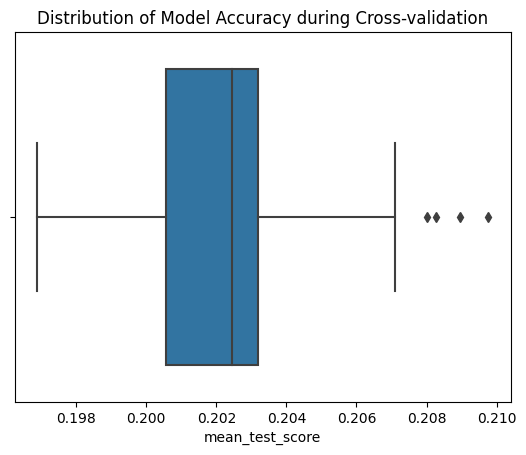

time: 125 ms (started: 2022-10-01 14:03:43 +07:00)


In [71]:
cvr = pd.DataFrame(GBM_.cv_results_)
cvr.head()
sns.boxplot(data = cvr, x = 'mean_test_score')
plt.title('Distribution of Model Accuracy during Cross-validation')

In [66]:
pickle.dump(GBM_, open('GBM_cls_tuned', 'wb'))
#cvr.to_csv('GBM_CVresult_cls_randomizedsearch.csv', index = False)

time: 329 ms (started: 2022-10-01 13:31:59 +07:00)


<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

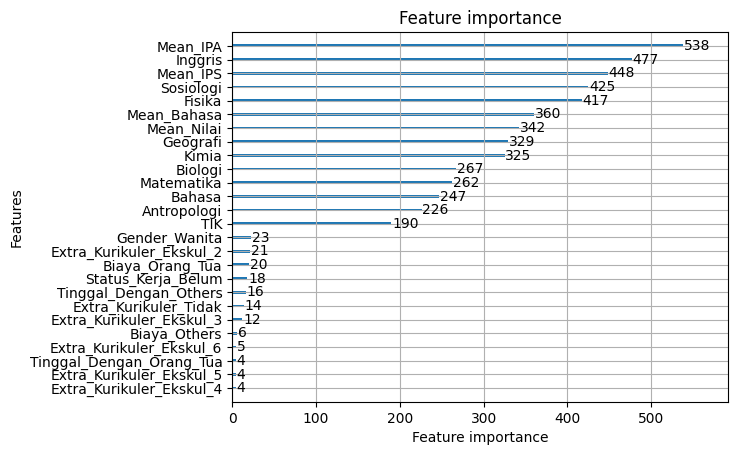

time: 2 s (started: 2022-10-01 13:30:38 +07:00)


In [65]:
from lightgbm import plot_importance
mod1 = LGBMClassifier(max_depth=1, min_child_samples=246, min_child_weight=100.0,
               n_estimators=1000, num_leaves=898, random_state=1311,
               reg_alpha=0.1, reg_lambda=10)
mod1.fit(X_train, y_train)
plot_importance(mod1)